Using Theano backend.


15081472/15296311 [============================>.] - ETA: 0s

WARNING (theano.tensor.blas): We did not found a dynamic library into the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 81s - loss: 0.2277 - val_loss: 0.1712
Epoch 2/10
60000/60000 [==============================] - 81s - loss: 0.1649 - val_loss: 0.1515
Epoch 3/10
60000/60000 [==============================] - 81s - loss: 0.1495 - val_loss: 0.1401
Epoch 4/10
60000/60000 [==============================] - 81s - loss: 0.1399 - val_loss: 0.1354
Epoch 5/10
60000/60000 [==============================] - 81s - loss: 0.1336 - val_loss: 0.1294
Epoch 6/10
60000/60000 [==============================] - 81s - loss: 0.1293 - val_loss: 0.1252
Epoch 7/10
60000/60000 [==============================] - 81s - loss: 0.1260 - val_loss: 0.1215
Epoch 8/10
60000/60000 [==============================] - 81s - loss: 0.1233 - val_loss: 0.1252
Epoch 9/10
60000/60000 [==============================] - 81s - loss: 0.1213 - val_loss: 0.1180
Epoch 10/10
60000/60000 [==============================] - 81s - loss: 0.1195 - val_lo

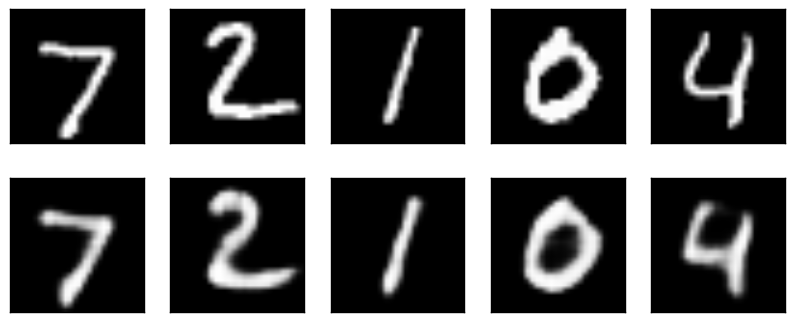

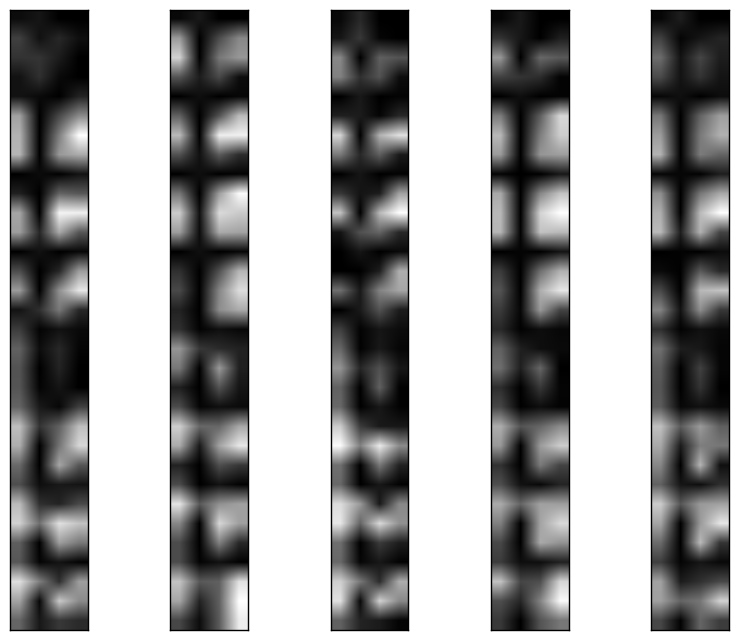

In [1]:
'''
Copyright

Jelen forráskód a Budapesti Műszaki és Gazdaságtudományi Egyetemen tartott
"Deep Learning a gyakorlatban Python és LUA alapon" tantárgy segédanyagaként készült.

A tantárgy honlapja: http://smartlab.tmit.bme.hu/oktatas-deep-learning
Deep Learning kutatás: http://smartlab.tmit.bme.hu/deep-learning

A forráskódot GPLv3 licensz védi. Újrafelhasználás esetén lehetőség szerint kérejük
az alábbi szerzőt értesíteni.

2016 (c) Csapó Tamás Gábor (csapot kukac tmit pont bme pont hu)


Original Convolutional AutoEncoder example from:

Links:
    [MNIST Dataset] http://yann.lecun.com/exdb/mnist/
    [Keras Convolutional AutoEncoder] https://blog.keras.io/building-autoencoders-in-keras.html
'''


from keras.layers import Input, Dense, Convolution2D, MaxPooling2D, UpSampling2D
from keras.models import Model

# MNIST mérete
input_img = Input(shape=(1, 28, 28))

# encoder rész, ReLU aktivációs függvénnyel
x = Convolution2D(16, 3, 3, activation='relu', border_mode='same')(input_img)
x = MaxPooling2D((2, 2), border_mode='same')(x)
x = Convolution2D(8, 3, 3, activation='relu', border_mode='same')(x)
x = MaxPooling2D((2, 2), border_mode='same')(x)
x = Convolution2D(8, 3, 3, activation='relu', border_mode='same')(x)
encoded = MaxPooling2D((2, 2), border_mode='same')(x)

# modell az encoder-re
encoder = Model(input=input_img, output=encoded)

# itt (8 x 4 x 4) azaz 128-dimenziós reprezentáció


# decoder rész, ReLU + végén szigmoid aktivációs függvénnyel
x = Convolution2D(8, 3, 3, activation='relu', border_mode='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Convolution2D(8, 3, 3, activation='relu', border_mode='same')(x)
x = UpSampling2D((2, 2))(x)
x = Convolution2D(16, 3, 3, activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Convolution2D(1, 3, 3, activation='sigmoid', border_mode='same')(x)

# modell a teljes AutoEncoder-re (encoder+decoder)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')




# train-test adatok

from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 1, 28, 28))
x_test = np.reshape(x_test, (len(x_test), 1, 28, 28))


# tanítás
autoencoder.fit(x_train, x_train,
                nb_epoch=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

# néhány digiten encode és decode
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)


n = 5  # 5 db digit
plt.figure(figsize=(10, 4))
for i in range(n):
    # ábra: eredeti képek
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # ábra: visszaállított képek
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


plt.figure(figsize=(10, 8))
for i in range(n):
    # ábra: encoder utáni eredmény, bottleneck reprezentáció
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(encoded_imgs[i].reshape(4, 4 * 8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()